# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(columns='Unnamed: 0', inplace=True)

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
heroes_df.columns = [x.lower() for x in heroes_df.columns]
powers_df.columns = [x.lower() for x in powers_df.columns]

In [5]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [6]:
for power in powers_df.columns:
    print(power)

hero_names
agility
accelerated healing
lantern power ring
dimensional awareness
cold resistance
durability
stealth
energy absorption
flight
danger sense
underwater breathing
marksmanship
weapons master
power augmentation
animal attributes
longevity
intelligence
super strength
cryokinesis
telepathy
energy armor
energy blasts
duplication
size changing
density control
stamina
astral travel
audio control
dexterity
omnitrix
super speed
possession
animal oriented powers
weapon-based powers
electrokinesis
darkforce manipulation
death touch
teleportation
enhanced senses
telekinesis
energy beams
magic
hyperkinesis
jump
clairvoyance
dimensional travel
power sense
shapeshifting
peak human condition
immortality
camouflage
element control
phasing
astral projection
electrical transport
fire control
projection
summoning
enhanced memory
reflexes
invulnerability
energy constructs
force fields
self-sustenance
anti-gravity
empathy
power nullifier
radiation control
psionic powers
elasticity
substance secr

In [7]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
gender        734 non-null object
eye color     734 non-null object
race          734 non-null object
hair color    734 non-null object
height        734 non-null float64
publisher     719 non-null object
skin color    734 non-null object
alignment     734 non-null object
weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [8]:
for column in powers_df.columns:
    if_na = getattr(powers_df, column).isna().any()
    if if_na:
        print(f'{column}: {if_na}')

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [9]:
# heroes_df.publisher has Nans. What does that column look like?
heroes_df.publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
Icon Comics            4
Shueisha               4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Microsoft              1
J. R. R. Tolkien       1
J. K. Rowling          1
Universal Studios      1
Titan Books            1
Hanna-Barbera          1
South Park             1
Rebellion              1
Name: publisher, dtype: int64

In [10]:
# heroes_df.weight has some nulls
heroes_df.loc[heroes_df.weight.isna()]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [11]:
heroes_df.fillna(heroes_df.weight.median(), axis=0, inplace=True)

In [12]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
gender        734 non-null object
eye color     734 non-null object
race          734 non-null object
hair color    734 non-null object
height        734 non-null float64
publisher     734 non-null object
skin color    734 non-null object
alignment     734 non-null object
weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [13]:
for column in heroes_df.columns:
    print(f'Column: {column}\n {getattr(heroes_df, column).unique()}\n\n')

Column: name
 ['A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas' 'Absorbing Man'
 'Adam Monroe' 'Adam Strange' 'Agent 13' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly'
 'Alfred Pennyworth' 'Alien' 'Allan Quatermain' 'Amazo' 'Ammo'
 'Ando Masahashi' 'Angel' 'Angel Dust' 'Angel Salvadore' 'Angela'
 'Animal Man' 'Annihilus' 'Ant-Man' 'Ant-Man II' 'Anti-Monitor'
 'Anti-Spawn' 'Anti-Venom' 'Apocalypse' 'Aquababy' 'Aqualad' 'Aquaman'
 'Arachne' 'Archangel' 'Arclight' 'Ardina' 'Ares' 'Ariel' 'Armor'
 'Arsenal' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II' 'Atom III'
 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bane' 'Banshee' 'Bantam'
 'Batgirl' 'Batgirl III' 'Batgirl IV' 'Batgirl V' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Beetle'
 'Ben 10' 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II

eye_color has a value called 'bown' which needs to become 'brown'.

gender has a '-' value. It's okay if it stays that way. It's a valid category.

hair_color has 'Brownn' value.

Many columns use an inconsistent delimiter for combination features like skin_color (i.e. blue-white and orange/white). Gonna leave this one for now.

weight and height columns have values that are nonsensical (-99.0 for each)

In [14]:
# how many weights are negative. 30% are negative numbers.
len(heroes_df.loc[heroes_df.weight < 0]) / len(heroes_df)

0.3228882833787466

In [15]:
len(heroes_df.loc[heroes_df.height < 0]) / len(heroes_df)

0.2956403269754768

If I set the weights and heights to the median, I'll lose sight of the variance of the data. What is the variance? Is it significant?

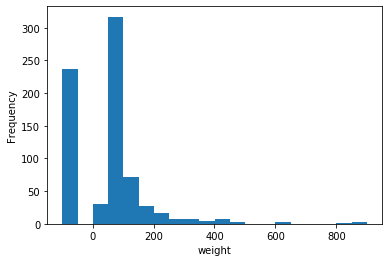

In [16]:
plt.xlabel('weight')
heroes_df.weight.plot(kind='hist', bins=20);

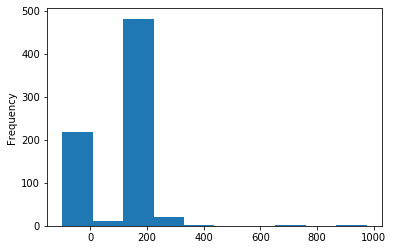

In [17]:
heroes_df.height.plot(kind='hist', bins=10);

It's possible that if the weights and heights that are set to -99 are all human I can assume that they won't be outlier data like the aliens in the dataset. Unfortunately, they aren't. Only 47/237 observations are human.

In [18]:
heroes_df.loc[(heroes_df.weight == -99)].race.value_counts()

-                     135
Human                  47
Mutant                 12
God / Eternal          12
Alpha                   5
Cosmic Entity           3
Symbiote                2
Android                 2
Cyborg                  2
Animal                  2
Kryptonian              2
Gungan                  1
Vampire                 1
Rodian                  1
Alien                   1
Human / Altered         1
Human / Cosmic          1
Parademon               1
Maiar                   1
Dathomirian Zabrak      1
Spartoi                 1
Frost Giant             1
Planet                  1
Human / Clone           1
Name: race, dtype: int64

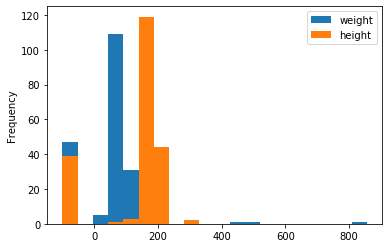

In [19]:
heroes_df.loc[heroes_df.race == 'Human'][['weight', 'height']].plot(kind='hist', bins=20);

In [20]:
# Which humans weigh over 300 pounds
heroes_df.loc[(heroes_df.weight > 300) & (heroes_df.race == 'Human')]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
119,Bloodaxe,Female,blue,Human,Brown,218.0,Marvel Comics,-,bad,495.0
373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,-,neutral,855.0
583,Scorpion,Male,brown,Human,Brown,211.0,Marvel Comics,-,bad,310.0
591,She-Hulk,Female,green,Human,Green,201.0,Marvel Comics,-,good,315.0


I initially wanted to see if the majority of the -99 weight and height values were attached to humans because humans' weights generally fall into a normal distribution. I could have used the mean or median of those values with a little more confidence than just imputing the median. Unfortunately, we're dealing with superheroes and any generalizations abou "human" weight distributions don't hold, as evidenced by the weights of some humans close to 500 pounds.

In [21]:
heroes_df['eye color'].replace('bown', 'brown', inplace=True)

In [22]:
heroes_df['hair color'].replace('brownn', 'brown', inplace=True)

In [23]:
clean_weight_med = heroes_df.loc[heroes_df.weight > 0].weight.median()
clean_weight_med

81.0

In [24]:
clean_height_med = heroes_df.loc[heroes_df.height > 0].height.median()
clean_height_med

183.0

In [25]:
# heroes_df.replace(heroes_df.loc[heroes_df.weight < 0].weight, heroes_df.weight.mean(), inplace=True)


heroes_df.weight = heroes_df.weight.map(lambda x: x if x > 0 else clean_weight_med)
heroes_df.height = heroes_df.height.map(lambda x: x if x > 0 else clean_height_med)

# heroes_df.loc[heroes_df.weight < 0] = clean_weight_med
# heroes_df.loc[heroes_df.height < 0] = clean_height_med
# heroes_df.head()

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [26]:
heroes_df.set_index('name')

,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0


In [27]:
powers_df.set_index('hero_names')

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [28]:
heroes_dedup = heroes_df.drop_duplicates(subset='name')

In [29]:
joined = heroes_dedup.join(powers_df, how='left')

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [30]:
male_female_heroes = heroes_dedup.loc[(heroes_df.gender == 'Male') | (heroes_df.gender == 'Female')]

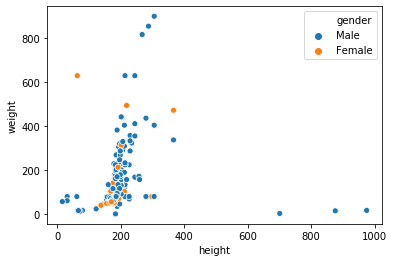

In [31]:
g = sns.scatterplot(x='height', y='weight',
              hue='gender',
              data=male_female_heroes);

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [32]:
def show_distplot(dataframe, gender, column_name):
    df = dataframe.loc[getattr(dataframe, 'gender') == gender]
    sns.distplot(getattr(df, column_name))

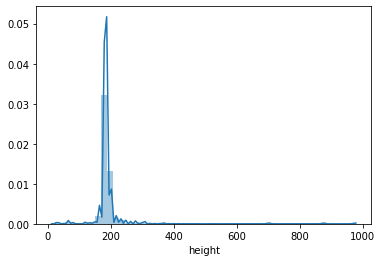

In [33]:
# Male Height
show_distplot(heroes_df, 'Male', 'height')
# sns.distplot(heroes_df.gender)

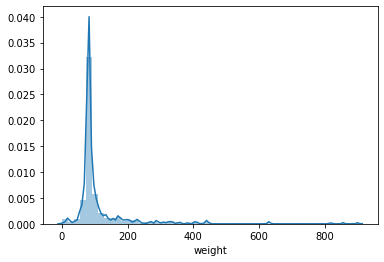

In [34]:
# Male Weight
show_distplot(heroes_df, 'Male', 'weight')

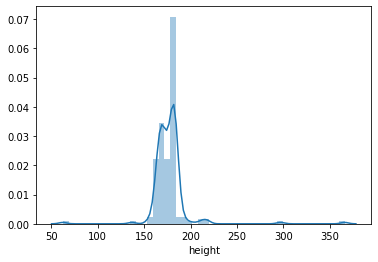

In [35]:
# Female Height
show_distplot(heroes_df, 'Female', 'height')

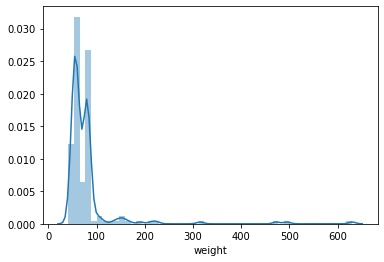

In [36]:
# Female Weight
show_distplot(heroes_df, 'Female', 'weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [37]:
powers_df.applymap(lambda x: 1 if x is True else 0).agg('sum', axis=0).sort_values(ascending=False).head()

super strength    360
stamina           289
durability        257
super speed       249
agility           242
dtype: int64

In [38]:
joined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 733
Data columns (total 178 columns):
name                            object
gender                          object
eye color                       object
race                            object
hair color                      object
height                          float64
publisher                       object
skin color                      object
alignment                       object
weight                          float64
hero_names                      object
agility                         object
accelerated healing             object
lantern power ring              object
dimensional awareness           object
cold resistance                 object
durability                      object
stealth                         object
energy absorption               object
flight                          object
danger sense                    object
underwater breathing            object
marksmanship                    ob

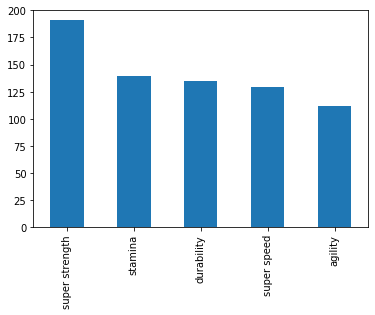

In [39]:
marvel_powers = joined.loc[joined.publisher == 'Marvel Comics']
marvel_powers.applymap(lambda x: 1 if x is True else 0).agg('sum', axis=0).sort_values(ascending=False).head(5).plot(kind='bar')


In [40]:
joined.publisher.unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 62.0, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

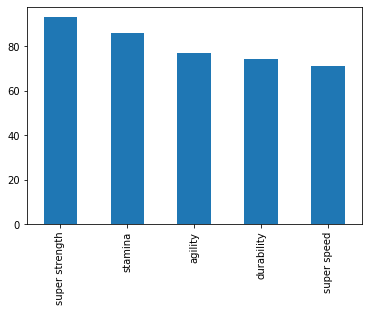

In [41]:
dc_powers = joined.loc[joined.publisher == 'DC Comics']
dc_powers.applymap(lambda x: 1 if x is True else 0).agg('sum', axis=0).sort_values(ascending=False).head().plot(kind='bar')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), 
and does this differ by gender?

In [42]:
# create new column that is an array of all the powers that a particular superhero has
joined['co_powers'] = joined.apply(lambda x: list(combinations(x.index[x == True].values, 2)), axis = 1)

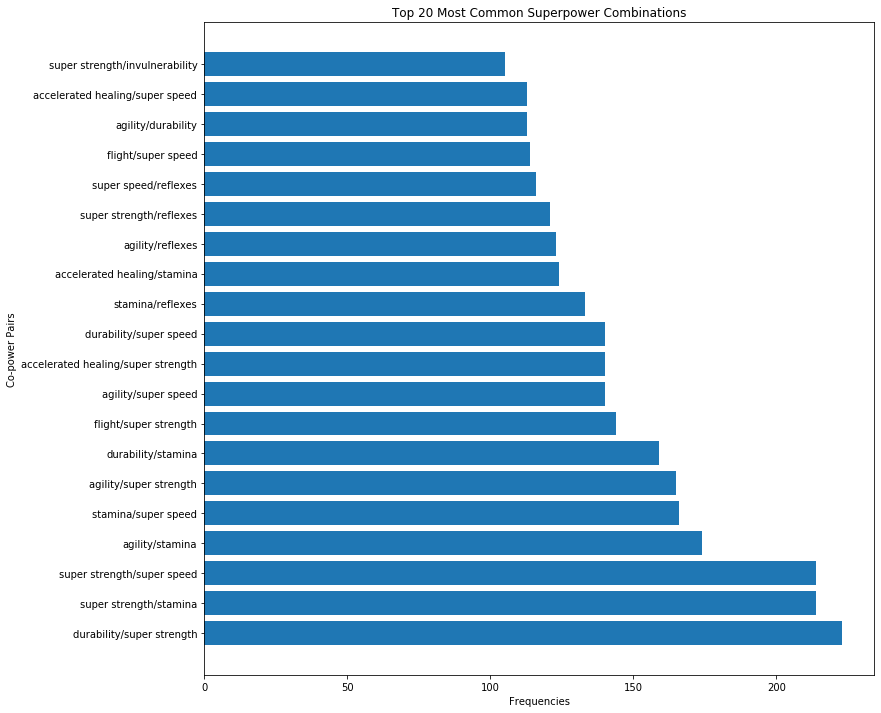

In [50]:
# Create counter to count frequency of each combination of powers
c = Counter([f'{co_power_pair[0]}/{co_power_pair[1]}' for row in joined['co_powers'] for co_power_pair in row])

# Return 20 most common co-power pairs and plot
most_common = c.most_common(20)
x = [x[0] for x in most_common]
y = [x[1] for x in most_common]
plt.figure(figsize=(12, 12))
plt.xlabel('Frequencies')
plt.ylabel('Co-power Pairs')
plt.title('Top 20 Most Common Superpower Combinations')
plt.barh(x, y);

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data